X_mean:[365.     11.3     4.225  16.775]
X_std:[134.48977656   4.34568752   1.99671605   6.31956288]
Optimal theta: [ 3.37453962e+04  1.09667155e+04  2.93192987e+01 -3.11675303e+02
 -1.78546718e+02]
Final cost: 197113.67232160826
xnorm: [[-0.85508358  0.27613582  0.38813731  0.51032011]
 [-0.48330811  0.85141879 -0.61350736  0.19384252]
 [-1.59863452 -0.75937351  1.64019315  1.30151407]
 [ 0.26024283 -0.29914714 -0.11268503 -0.75559023]
 [ 1.00379377  2.00198472 -1.1143297  -1.07206782]
 [ 1.74734471 -1.44971307 -1.36474087 -1.38854541]
 [-0.11153264  1.54175835 -0.36309619 -0.28087386]
 [ 0.6320183  -0.87443011  0.88895965  0.82679769]
 [-1.22685905 -0.52926033  1.89060432  2.09270803]
 [-0.66919585  0.6213056   0.13772614  0.51032011]
 [-0.29742038  0.04602264  0.63854848  0.19384252]
 [ 1.37556924 -1.21959989 -1.1143297  -1.23030661]
 [ 0.6320183   1.08153197 -0.61350736 -0.67647084]
 [-1.04097132  0.50624901  1.13937082  0.6685589 ]
 [ 0.07435509 -0.29914714  1.38978198 -0.43911265

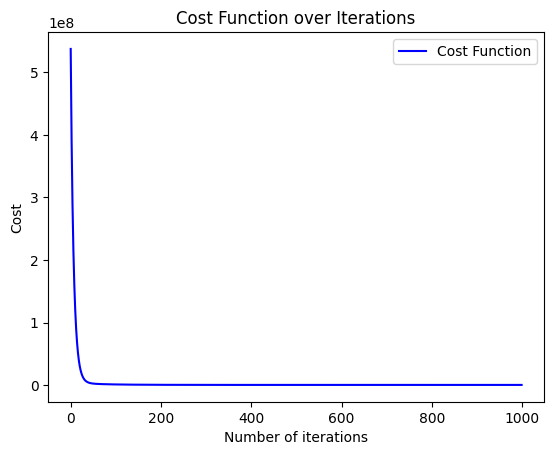

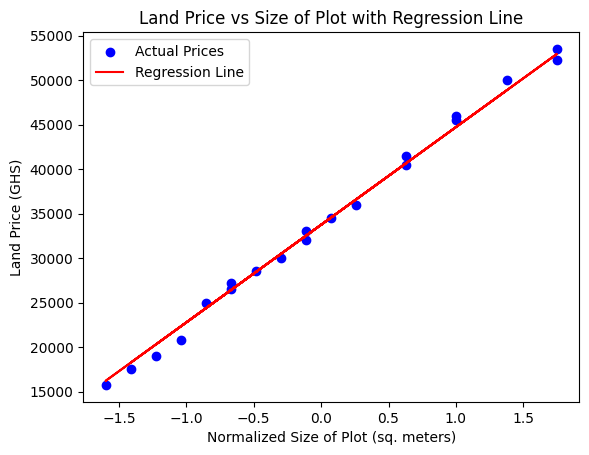

newnorm:[[ 1.74734471 -1.44971307  2.89224899 -1.07206782]]
Predicted land price: 52155.49564380715


In [1]:
import warnings
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import matplotlib.pyplot as plt
import time
warnings.filterwarnings("ignore")

# Load the dataset
data = pd.read_csv('full data.csv') #place the path of the data

# Remove commas from 'Land Price (GHS)' and convert it to float
data['Land Price (GHS)'] = data['Land Price (GHS)'].replace({',': ''}, regex=True).astype(float)

# Separate features (Size, Distance) and target (Price)
X = data[['Size of Plot (sq. meters)', 'Distance from Airport (km)','Proximity to Main Road (km)','Proximity to City Center (km)',]].values
y = data['Land Price (GHS)'].values
# Normalize the features
X_mean = X.mean(axis=0)
X_std = X.std(axis=0)
X_norm = (X - X_mean) / X_std
print(f"X_mean:{X_mean}")
print(f"X_std:{X_std}")
# Add a column of 1's for the bias term (theta_0)
m = len(y)  # number of training examples
X_b = np.c_[np.ones((m, 1)), X_norm]  # Add bias term (intercept)

# Define the cost function (Mean Squared Error)
def compute_cost(X_b, y, theta):
    m = len(y)
    predictions = X_b.dot(theta)  # Predictions based on current theta
    cost = (1/(2*m)) * np.sum((predictions - y) ** 2)
    return cost
# Define the gradient descent function
# Stochastic Gradient Descent function
start_time = time.time()  # Fix: Correctly capture the current time
def stochastic_gradient_descent(X_b, y, theta, alpha, iterations):
    m = len(y)
    cost_history = np.zeros(iterations)
    
    for i in range(iterations):
        # Shuffle the data to avoid cycles
        shuffled_indices = np.random.permutation(m)
        X_b_shuffled = X_b[shuffled_indices]
        y_shuffled = y[shuffled_indices]
        
        for j in range(m):
            xi = X_b_shuffled[j:j+1]  # Single training example
            yi = y_shuffled[j:j+1]    # Corresponding target
            prediction = xi.dot(theta)  # Predict using current theta
            error = prediction - yi
            gradients = xi.T.dot(error)  # Compute gradient with the single example
            theta= theta - alpha * gradients  # Update theta
        
        # Store cost after each iteration over the entire dataset
        cost_history[i] = compute_cost(X_b, y, theta)
    
    return theta, cost_history
endtime=time.time()
# Gradient Descent parameters
#alpha = 0.00359  # Learning rate
alpha = 0.00359  # Learning rate
iterations = 1000  # Number of iterations
theta = np.zeros(X_b.shape[1])  # Initialize parameters (theta) with zeros

# Run Gradient Descent
theta_optimal, cost_history = stochastic_gradient_descent(X_b, y, theta, alpha, iterations)

# Print final theta values and final cost
print(f"Optimal theta: {theta_optimal}")
print(f"Final cost: {cost_history[-1]}")
print(f"xnorm: {X_norm}")

# Plot cost function history
plt.plot(range(iterations), cost_history, 'b-', label="Cost Function")
plt.xlabel("Number of iterations")
plt.ylabel("Cost")
plt.title("Cost Function over Iterations")
plt.legend()
plt.show()

# Select only the "Size of Plot" as the feature for plotting (ignoring "Distance from Airport")
X_size = X_norm[:, 0]  # Normalized 'Size of Plot' column
theta_2d = theta_optimal[[0, 1]]  # Only use the intercept and theta for "Size of Plot"

# Plot the dataset
plt.scatter(X_size, y, color='blue', label="Actual Prices")

# Calculate the regression line (using optimal theta)
predicted_prices = X_b[:, [0, 1]].dot(theta_2d)  # Only use intercept and first feature (size)
plt.plot(X_size, predicted_prices, color='red', label="Regression Line")

# Adding labels and title
plt.xlabel("Normalized Size of Plot (sq. meters)")
plt.ylabel("Land Price (GHS)")
plt.title("Land Price vs Size of Plot with Regression Line")
plt.legend()
plt.show()
new_data = np.array([[600, 5, 10, 10]])  # Example size and distance

# Normalize the new input data
new_data_norm = (new_data - X_mean) / X_std
new_data_b = np.c_[np.ones((1, 1)), new_data_norm]  # Add bias term
print(f"newnorm:{new_data_norm}")
# Predict using the optimal theta
predicted_price = new_data_b.dot(theta_optimal)
print(f"Predicted land price: {predicted_price[0]}")
# Prediction
predictions = new_data_b.dot(theta_optimal)


In [2]:
import pandas as pd
import numpy as np

def prepare_data(data):
    """
    This function prepares the data for training by separating the features and target variable.
    It assumes that the target variable is always the last column in the pandas DataFrame, 
    and the features are all the columns up to that.
    The function accounts for missing values by imputing the mean for numerical columns and the mode for categorical columns.
    It additionally checks if the input data is a dictionary, DataFrame, or a file path (CSV/Excel) and processes it accordingly,
    attempting to load the data if it's a file path. In the case of a dictionary, it converts it to a DataFrame.
    If the dataframe is empty, has only one column, or has no target column, the function raises a ValueError.
    
    Parameters:
    data (pd.DataFrame, dict, str): The dataset to prepare. It can be a DataFrame, dictionary, or a file path (CSV/Excel).
    
    Returns:
    X (np.array): The features
    y (np.array): The target variable
    """
    if isinstance(data, dict):
        data = pd.DataFrame(data)
    elif isinstance(data, str):
        if data.endswith('.csv'):
            data = pd.read_csv(data)
        elif data.endswith('.xlsx') or data.endswith('.xls'):
            data = pd.read_excel(data)
        else:
            raise ValueError("Unsupported file format. Please provide a CSV or Excel file.")
    elif not isinstance(data, pd.DataFrame):
        raise ValueError("Input data must be a pandas DataFrame, dictionary, or a file path (CSV/Excel).")
    
    if data.empty:
        raise ValueError("The input DataFrame is empty.")
    
    if data.shape[1] < 2:
        raise ValueError("The input DataFrame must have at least one feature column and one target column.")
    
    for column in data.columns:
        if data[column].dtype == np.number:
            data[column].fillna(data[column].mean(), inplace=True)
        else:
            data[column].fillna(data[column].mode()[0], inplace=True)
    
    feature_columns = data.columns[:-1]
    target_column = data.columns[-1]
    

    X = data[feature_columns].values
    y = data[target_column].values
    
    return X, y

In [3]:
X, y = prepare_data(data)
print("Features (X):", X)
print("Target (y):", y)

Features (X): [[250.   12.5   5.   20. ]
 [300.   15.    3.   18. ]
 [150.    8.    7.5  25. ]
 [400.   10.    4.   12. ]
 [500.   20.    2.   10. ]
 [600.    5.    1.5   8. ]
 [350.   18.    3.5  15. ]
 [450.    7.5   6.   22. ]
 [200.    9.    8.   30. ]
 [275.   14.    4.5  20. ]
 [325.   11.5   5.5  18. ]
 [550.    6.    2.    9. ]
 [450.   16.    3.   12.5]
 [225.   13.5   6.5  21. ]
 [375.   10.    7.   14. ]
 [175.   17.5   5.   28. ]
 [275.   11.    4.   19. ]
 [350.    8.    2.5  15.5]
 [500.    9.5   3.   11. ]
 [600.    4.    1.    7.5]]
Target (y): [25000. 28500. 15750. 36000. 45500. 52200. 32000. 40500. 19000. 27250.
 30000. 50000. 41500. 20750. 34500. 17500. 26500. 33000. 46000. 53500.]


Testing with a dictionary

In [4]:
data = {
    'Size of Plot (sq. meters)': [600, 800, np.nan, 1000, 1200],
    'Distance from Airport (km)': [5, 10, 15, np.nan, 25],
    'Proximity to Main Road (km)': [1, 2, 3, 4, np.nan],
    'Proximity to City Center (km)': [10, 20, 30, 40, 50],
    'Land Price (GHS)': [10000, 20000, 30000, 40000, np.nan]
}

X_func, y_func = prepare_data(data)
print("Features (X):", X_func)
print("Target (y):", y_func)

Features (X): [[6.000e+02 5.000e+00 1.000e+00 1.000e+01]
 [8.000e+02 1.000e+01 2.000e+00 2.000e+01]
 [9.000e+02 1.500e+01 3.000e+00 3.000e+01]
 [1.000e+03 1.375e+01 4.000e+00 4.000e+01]
 [1.200e+03 2.500e+01 2.500e+00 5.000e+01]]
Target (y): [10000. 20000. 30000. 40000. 25000.]


In [5]:
def calculate_accuracy(y_true, y_pred): 
    """
    This function calculates and returns various accuracy metrics for the model.
    
    Parameters:
    y_true (np.array): The true target values
    y_pred (np.array): The predicted target values
    
    Returns:
    dict: A dictionary containing various accuracy metrics
    
    Metrics:
    - Mean Absolute Error (MAE): The average of the absolute differences between the predicted and actual values.
    - Mean Squared Error (MSE): The average of the squared differences between the predicted and actual values.
    - Root Mean Squared Error (RMSE): The square root of the average of the squared differences between the predicted and actual values.
    - R-squared (R²): The proportion of the variance in the dependent variable that is predictable from the independent variables.
    - Mean Absolute Percentage Error (MAPE): The average of the absolute percentage differences between the predicted and actual values.
    - Explained Variance Score (EVS): Measures the proportion of the variance in the target variable that is explained by the model.
    """
    import numpy as np

    metrics = {}
    metrics['MAE'] = np.mean(np.abs(y_true - y_pred))
    
    metrics['MSE'] = np.mean((y_true - y_pred) ** 2)
    
    metrics['RMSE'] = np.sqrt(metrics['MSE'])
    
    ss_total = np.sum((y_true - np.mean(y_true)) ** 2)
    ss_residual = np.sum((y_true - y_pred) ** 2)
    metrics['R2'] = 1 - (ss_residual / ss_total)
    
    metrics['MAPE'] = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    
    variance_y_true = np.var(y_true)
    variance_residual = np.var(y_true - y_pred)
    metrics['EVS'] = 1 - (variance_residual / variance_y_true)
    
    return metrics

In [6]:
y_true = y  
y_pred = X_b.dot(theta_optimal)

accuracy_metrics = calculate_accuracy(y_true, y_pred)
accuracy_metrics

{'MAE': 514.1556550923672,
 'MSE': 394227.34464321646,
 'RMSE': 627.8752620092756,
 'R2': 0.9969500649288171,
 'MAPE': 1.683321232315402,
 'EVS': 0.9969500991705901}